In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import iexfinance
from iexfinance.stocks import get_historical_data
from datetime import datetime, date

In [2]:
#pip install iexfinance

In [3]:
price_df=pd.read_csv("static/data/BBG_price_data.csv")
price_df

,Date,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle,Soy Oil,Crush Margin,Soybean meal
0,1/4/10,418.50,557.75,1049.50,76.00,85.375,37.73,NaN,NaN
1,1/5/10,418.75,553.00,1052.25,73.12,86.325,37.54,NaN,NaN
2,1/6/10,421.75,567.25,1050.50,73.55,85.950,37.70,NaN,NaN
3,1/7/10,417.50,557.75,1017.75,72.89,85.925,36.62,0.99,326.5
4,1/8/10,423.00,568.50,1013.00,72.44,85.825,36.49,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2896,7/2/21,697.25,645.75,1451.75,86.03,122.000,NaN,NaN,NaN
2897,7/6/21,656.00,620.00,1363.75,86.38,122.400,71.12,NaN,NaN
2898,7/7/21,652.50,614.75,1386.50,86.63,120.600,NaN,NaN,NaN
2899,7/8/21,638.00,612.25,1390.25,85.88,119.275,NaN,3.12,362.1


In [4]:
price_df.dtypes

Date              object
Corn Price       float64
Wheat Price      float64
Soybean Price    float64
Cotton Price     float64
Live Cattle      float64
Soy Oil          float64
Crush Margin     float64
Soybean meal     float64
dtype: object

In [5]:
price_df["Date"]=pd.to_datetime(price_df.Date,format='%m/%d/%y')


In [6]:
price_df.dtypes

Date             datetime64[ns]
Corn Price              float64
Wheat Price             float64
Soybean Price           float64
Cotton Price            float64
Live Cattle             float64
Soy Oil                 float64
Crush Margin            float64
Soybean meal            float64
dtype: object

In [7]:
price_df

,Date,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle,Soy Oil,Crush Margin,Soybean meal
0,2010-01-04,418.50,557.75,1049.50,76.00,85.375,37.73,NaN,NaN
1,2010-01-05,418.75,553.00,1052.25,73.12,86.325,37.54,NaN,NaN
2,2010-01-06,421.75,567.25,1050.50,73.55,85.950,37.70,NaN,NaN
3,2010-01-07,417.50,557.75,1017.75,72.89,85.925,36.62,0.99,326.5
4,2010-01-08,423.00,568.50,1013.00,72.44,85.825,36.49,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2896,2021-07-02,697.25,645.75,1451.75,86.03,122.000,NaN,NaN,NaN
2897,2021-07-06,656.00,620.00,1363.75,86.38,122.400,71.12,NaN,NaN
2898,2021-07-07,652.50,614.75,1386.50,86.63,120.600,NaN,NaN,NaN
2899,2021-07-08,638.00,612.25,1390.25,85.88,119.275,NaN,3.12,362.1


Text(0.5, 1.0, 'Corn Price')

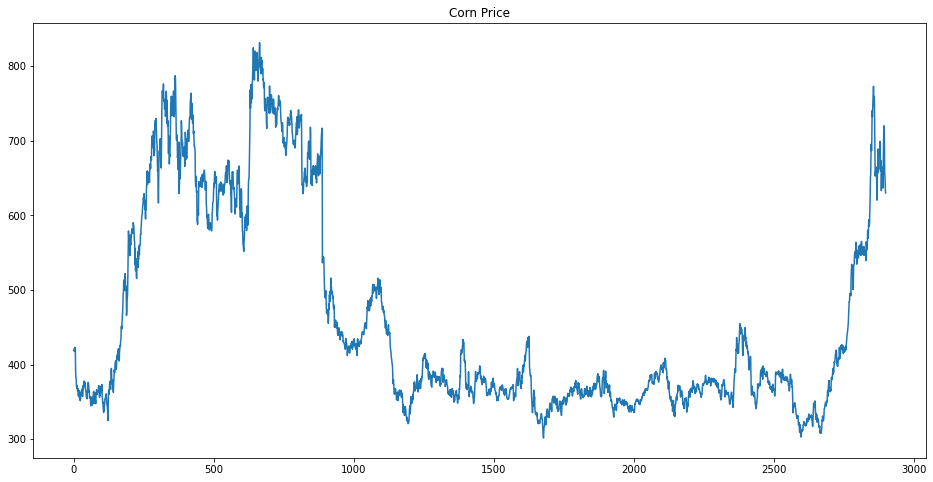

In [8]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Corn Price"],label='Close Price history')
plt.title("Corn Price")

Text(0.5, 1.0, 'Wheat Price')

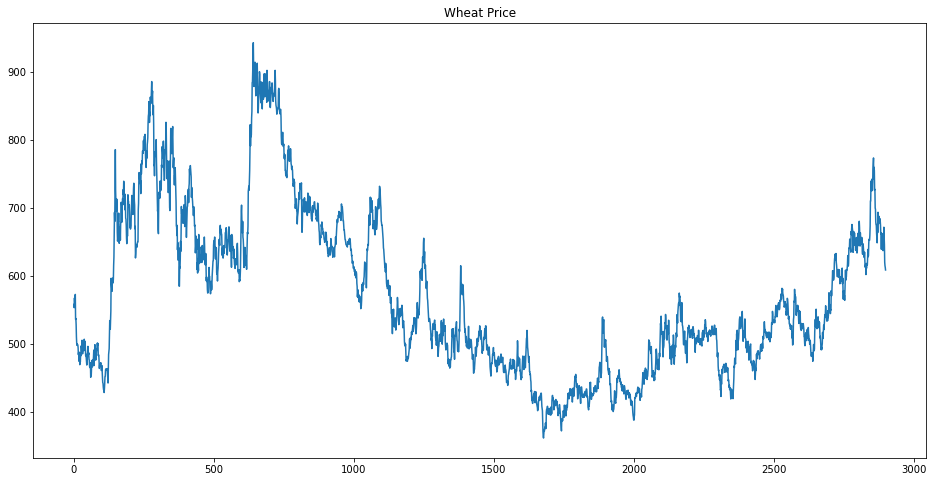

In [9]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Wheat Price"],label='Close Price history')
plt.title("Wheat Price")

Text(0.5, 1.0, 'Soybean Price')

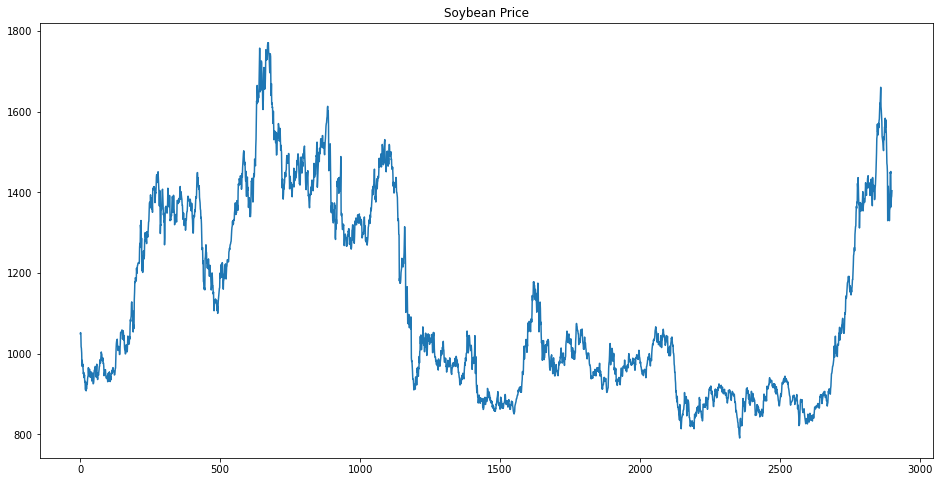

In [10]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Soybean Price"],label='Close Price history')
plt.title("Soybean Price")

Text(0.5, 1.0, 'Cotton Price')

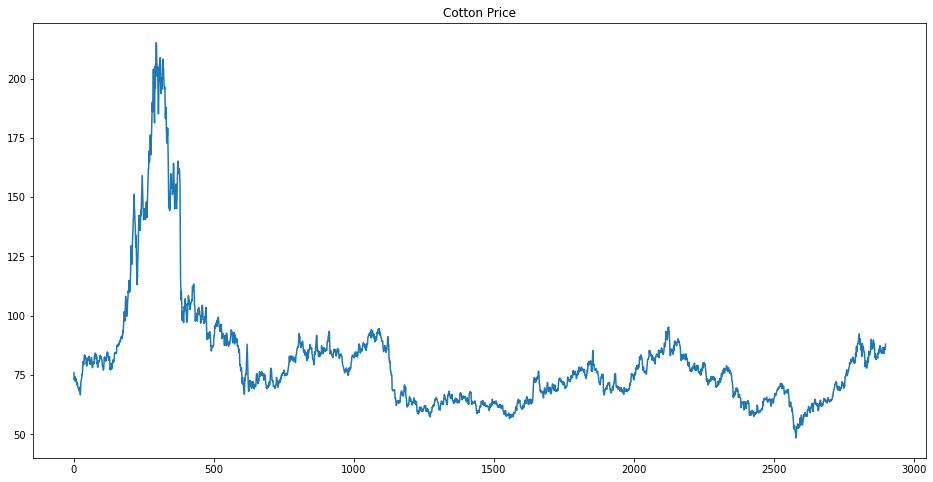

In [11]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Cotton Price"],label='Close Price history')
plt.title("Cotton Price")

Text(0.5, 1.0, 'Live Cattle Price')

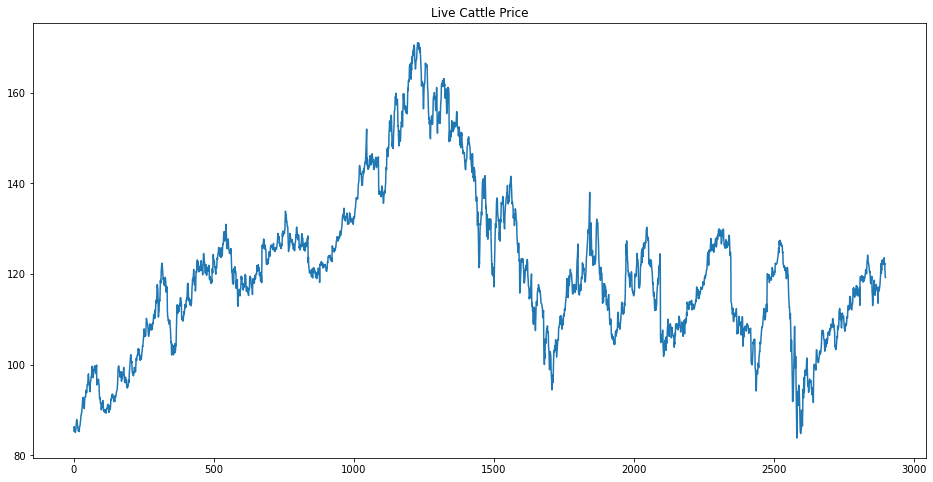

In [12]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Live Cattle"],label='Close Price history')
plt.title("Live Cattle Price")

In [13]:
corn_df= price_df.drop(columns=['Soy Oil', 'Crush Margin', 'Soybean meal','Soybean Price','Wheat Price','Cotton Price', 'Live Cattle'])
corn_df["Corn Price Lag 1"]= corn_df['Corn Price'].shift(1)
corn_df["Corn Price Lag 5"]= corn_df['Corn Price'].shift(5)
corn_df["Corn Price Lag 10"]= corn_df['Corn Price'].shift(10)
corn_df["Corn Price Lag 20"]= corn_df['Corn Price'].shift(20)
corn_df.dropna(inplace=True)
corn_df

,Date,Corn Price,Corn Price Lag 1,Corn Price Lag 5,Corn Price Lag 10,Corn Price Lag 20
20,2010-02-02,365.00,359.00,362.25,369.25,418.50
21,2010-02-03,353.00,365.00,358.25,368.00,418.75
22,2010-02-04,354.00,353.00,361.75,372.00,421.75
23,2010-02-05,351.50,354.00,356.50,364.75,417.50
24,2010-02-08,356.00,351.50,359.00,367.75,423.00
...,...,...,...,...,...,...
2896,2021-07-02,697.25,719.75,636.50,655.25,682.75
2897,2021-07-06,656.00,697.25,675.50,659.25,679.25
2898,2021-07-07,652.50,656.00,694.50,659.75,680.00
2899,2021-07-08,638.00,652.50,720.00,664.25,690.75


In [14]:
wheat_df= price_df.drop(columns=['Soy Oil', 'Crush Margin', 'Soybean meal','Soybean Price','Corn Price','Cotton Price', 'Live Cattle'])
wheat_df["Wheat Price Lag 1"]= wheat_df['Wheat Price'].shift(1)
wheat_df["Wheat Price Lag 5"]= wheat_df['Wheat Price'].shift(5)
wheat_df["Wheat Price Lag 10"]= wheat_df['Wheat Price'].shift(10)
wheat_df["Wheat Price Lag 20"]= wheat_df['Wheat Price'].shift(20)
wheat_df.dropna(inplace=True)
wheat_df

,Date,Wheat Price,Wheat Price Lag 1,Wheat Price Lag 5,Wheat Price Lag 10,Wheat Price Lag 20
20,2010-02-02,487.25,474.75,494.00,500.50,557.75
21,2010-02-03,469.00,487.25,483.75,497.50,553.00
22,2010-02-04,475.75,469.00,487.00,499.50,567.25
23,2010-02-05,473.25,475.75,474.00,498.50,557.75
24,2010-02-08,484.00,473.25,474.75,498.25,568.50
...,...,...,...,...,...,...
2896,2021-07-02,645.75,658.50,637.00,662.75,687.75
2897,2021-07-06,620.00,645.75,646.00,661.50,680.00
2898,2021-07-07,614.75,620.00,639.75,651.00,685.00
2899,2021-07-08,612.25,614.75,671.50,661.25,682.25


In [15]:
soybean_df= price_df.drop(columns=['Soy Oil', 'Crush Margin', 'Soybean meal','Wheat Price','Corn Price','Cotton Price', 'Live Cattle'])
soybean_df["Soybean Price Lag 1"]= soybean_df['Soybean Price'].shift(1)
soybean_df["Soybean Price Lag 5"]= soybean_df['Soybean Price'].shift(5)
soybean_df["Soybean Price Lag 10"]= soybean_df['Soybean Price'].shift(10)
soybean_df["Soybean Price Lag 20"]= soybean_df['Soybean Price'].shift(20)
soybean_df.dropna(inplace=True)
soybean_df

,Date,Soybean Price,Soybean Price Lag 1,Soybean Price Lag 5,Soybean Price Lag 10,Soybean Price Lag 20
20,2010-02-02,925.50,909.75,947.50,963.50,1049.50
21,2010-02-03,908.00,925.50,929.00,950.00,1052.25
22,2010-02-04,914.00,908.00,931.75,954.00,1050.50
23,2010-02-05,913.50,914.00,914.00,951.50,1017.75
24,2010-02-08,929.50,913.50,909.75,940.50,1013.00
...,...,...,...,...,...,...
2896,2021-07-02,1451.75,1446.75,1329.75,1396.00,1583.75
2897,2021-07-06,1363.75,1451.75,1357.00,1415.00,1560.25
2898,2021-07-07,1386.50,1363.75,1359.75,1394.50,1580.00
2899,2021-07-08,1390.25,1386.50,1450.00,1385.00,1562.50


In [16]:
cotton_df= price_df.drop(columns=['Soy Oil', 'Crush Margin', 'Soybean meal','Wheat Price','Corn Price','Soybean Price', 'Live Cattle'])
cotton_df["Cotton Price Lag 1"]= cotton_df['Cotton Price'].shift(1)
cotton_df["Cotton Price Lag 5"]= cotton_df['Cotton Price'].shift(5)
cotton_df["Cotton Price Lag 10"]= cotton_df['Cotton Price'].shift(10)
cotton_df["Cotton Price Lag 20"]= cotton_df['Cotton Price'].shift(20)
cotton_df.dropna(inplace=True)
cotton_df

,Date,Cotton Price,Cotton Price Lag 1,Cotton Price Lag 5,Cotton Price Lag 10,Cotton Price Lag 20
20,2010-02-02,69.26,68.22,69.82,71.64,76.00
21,2010-02-03,69.82,69.26,69.23,70.80,73.12
22,2010-02-04,68.99,69.82,69.14,71.85,73.55
23,2010-02-05,66.62,68.99,69.03,71.07,72.89
24,2010-02-08,69.16,66.62,68.22,69.96,72.44
...,...,...,...,...,...,...
2896,2021-07-02,86.03,85.01,86.43,84.42,85.80
2897,2021-07-06,86.38,86.03,86.66,84.09,84.36
2898,2021-07-07,86.63,86.38,86.49,84.22,85.14
2899,2021-07-08,85.88,86.63,84.03,86.46,86.62


In [17]:
cattle_df= price_df.drop(columns=['Soy Oil', 'Crush Margin', 'Soybean meal','Wheat Price','Corn Price','Soybean Price', 'Cotton Price'])
cattle_df["Live Cattle Price Lag 1"]= cattle_df['Live Cattle'].shift(1)
cattle_df["Live Cattle Price Lag 5"]= cattle_df['Live Cattle'].shift(5)
cattle_df["Live Cattle Price Lag 10"]= cattle_df['Live Cattle'].shift(10)
cattle_df["Live Cattle Price Lag 20"]= cattle_df['Live Cattle'].shift(20)
cattle_df.dropna(inplace=True)
cattle_df

,Date,Live Cattle,Live Cattle Price Lag 1,Live Cattle Price Lag 5,Live Cattle Price Lag 10,Live Cattle Price Lag 20
20,2010-02-02,86.225,85.250,85.525,87.900,85.375
21,2010-02-03,86.450,86.225,85.375,87.450,86.325
22,2010-02-04,86.550,86.450,85.650,86.850,85.950
23,2010-02-05,87.425,86.550,85.800,86.625,85.925
24,2010-02-08,87.675,87.425,85.250,86.200,85.825
...,...,...,...,...,...,...
2896,2021-07-02,122.000,123.575,122.825,121.050,116.825
2897,2021-07-06,122.400,122.000,122.100,120.975,116.225
2898,2021-07-07,120.600,122.400,122.550,123.100,116.725
2899,2021-07-08,119.275,120.600,122.500,122.500,117.400


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
data_frame_list =[corn_df,wheat_df, soybean_df, cotton_df, cattle_df]
commodity_list =['Corn Price','Wheat Price','Soybean Price','Cotton Price', 'Live Cattle']

86.49265473844163
0.9955340117706902
127.9090262463266
0.9911791515608415


C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


269.0372175943896
0.9951068439751177
3.0290468059260176
0.9950816912250361


C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


2.0207258688874297
0.9930742145757803


C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


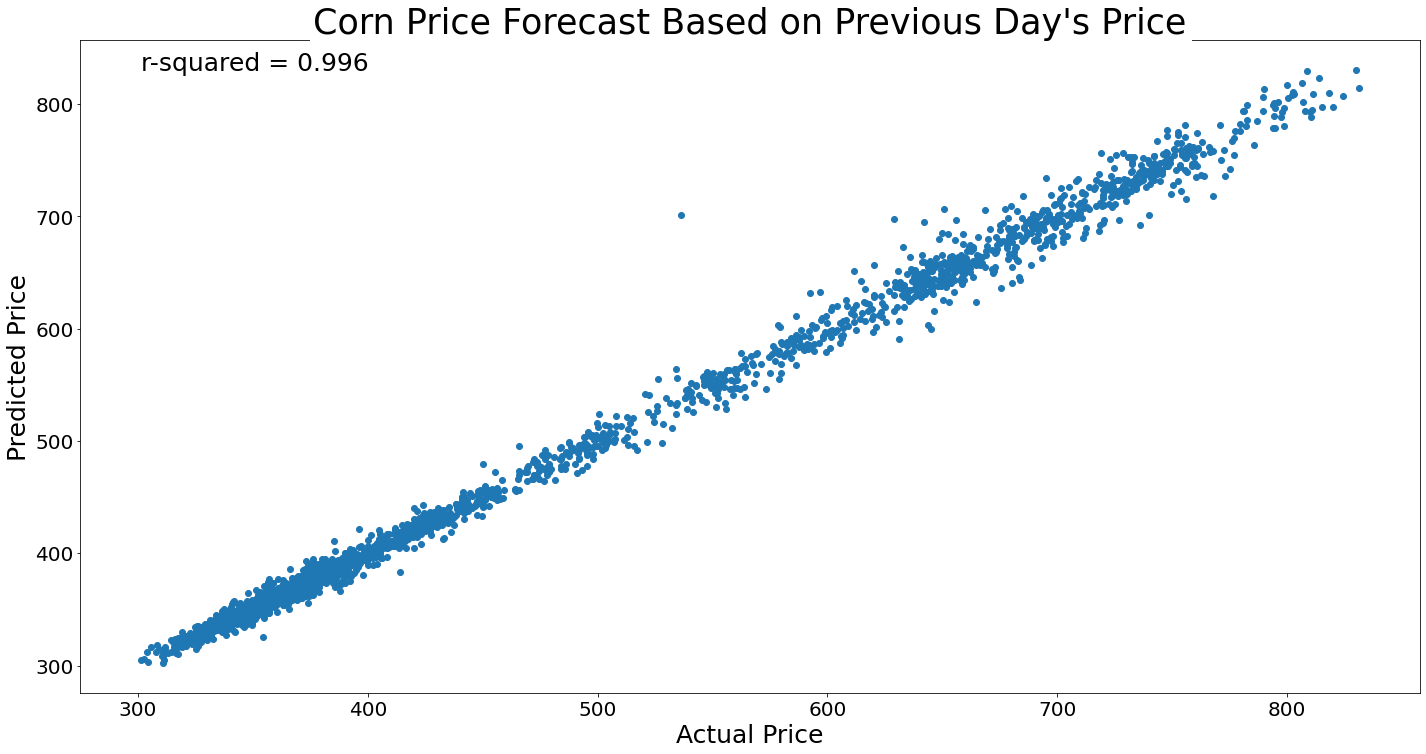

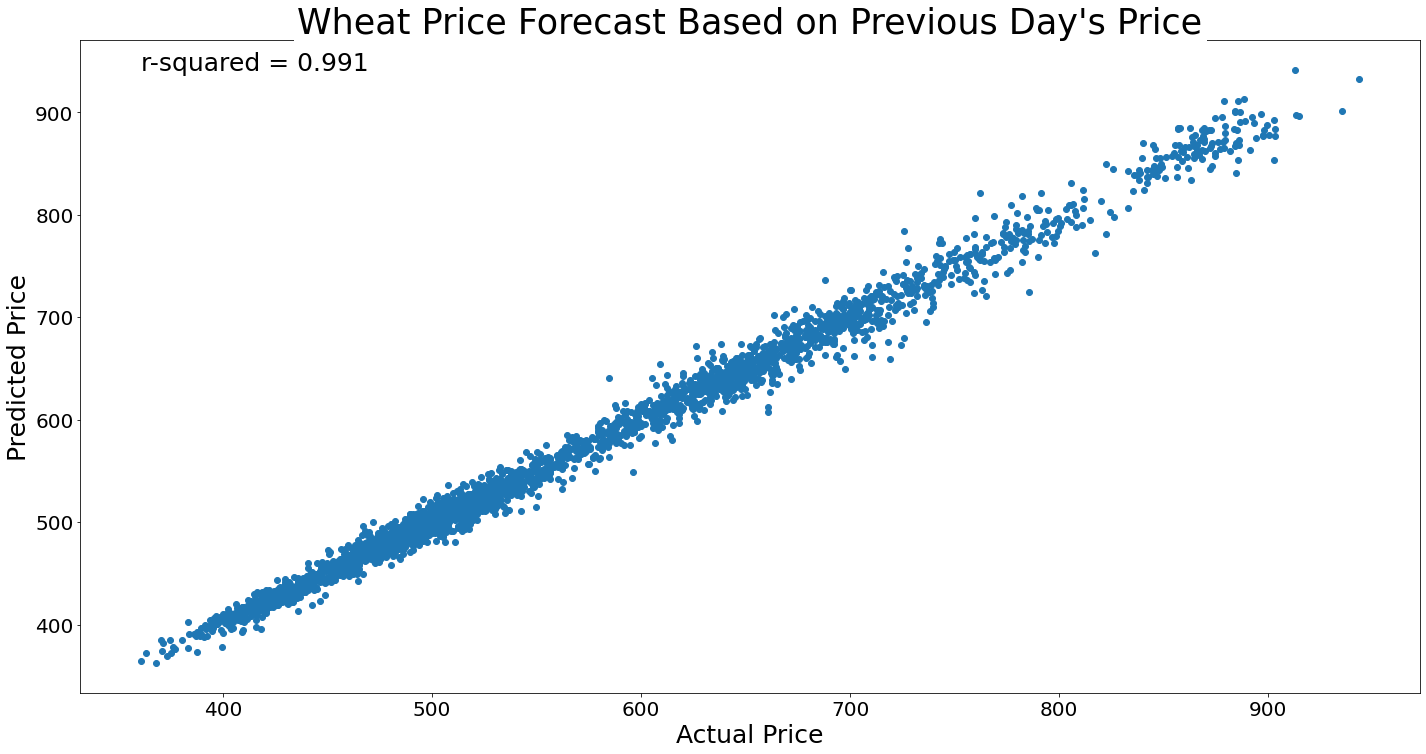

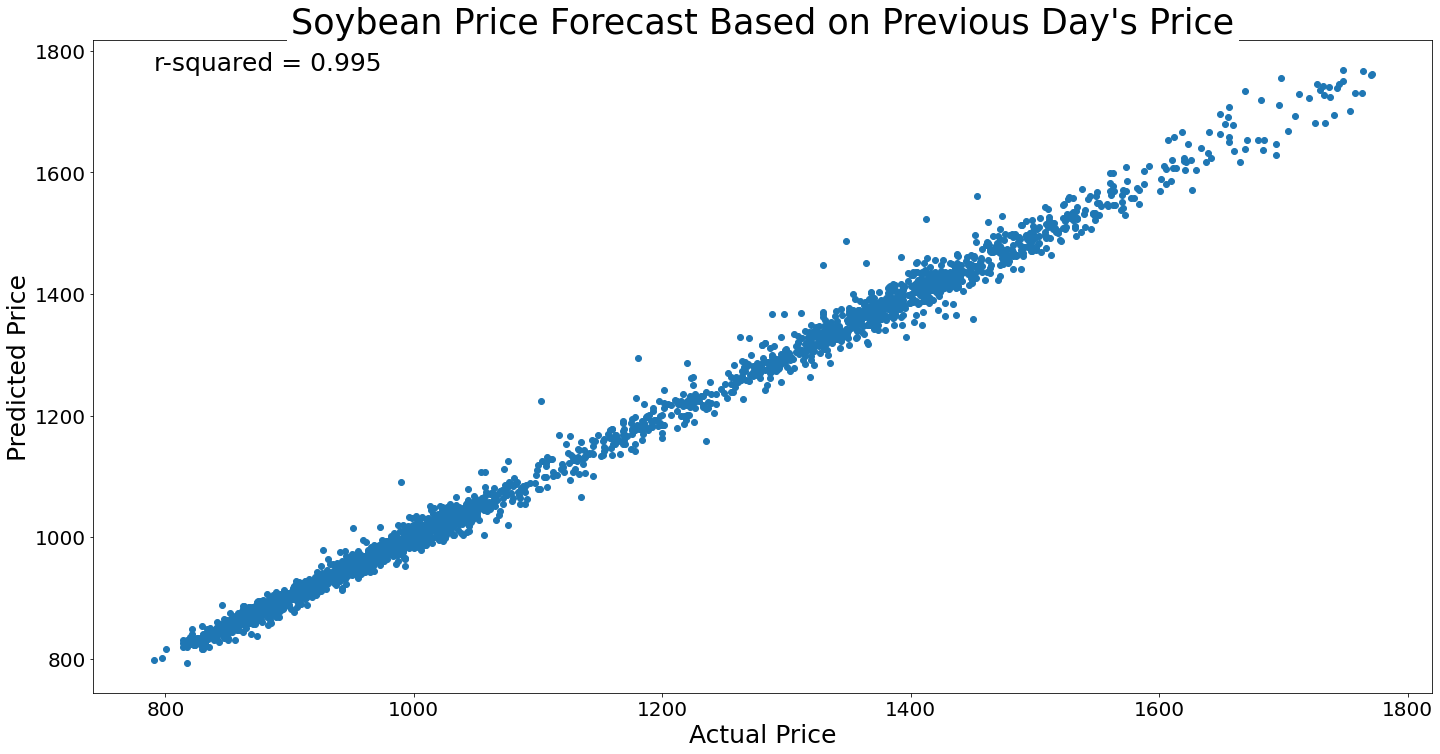

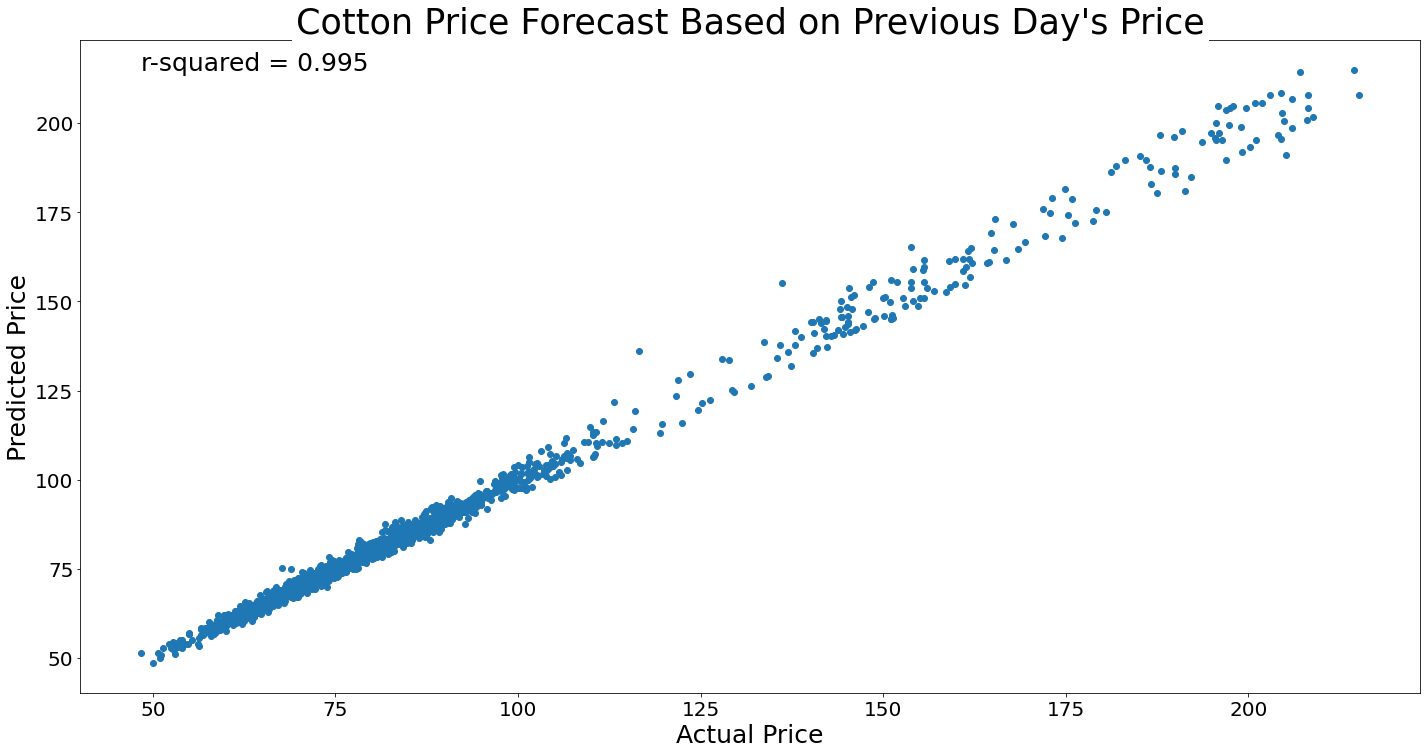

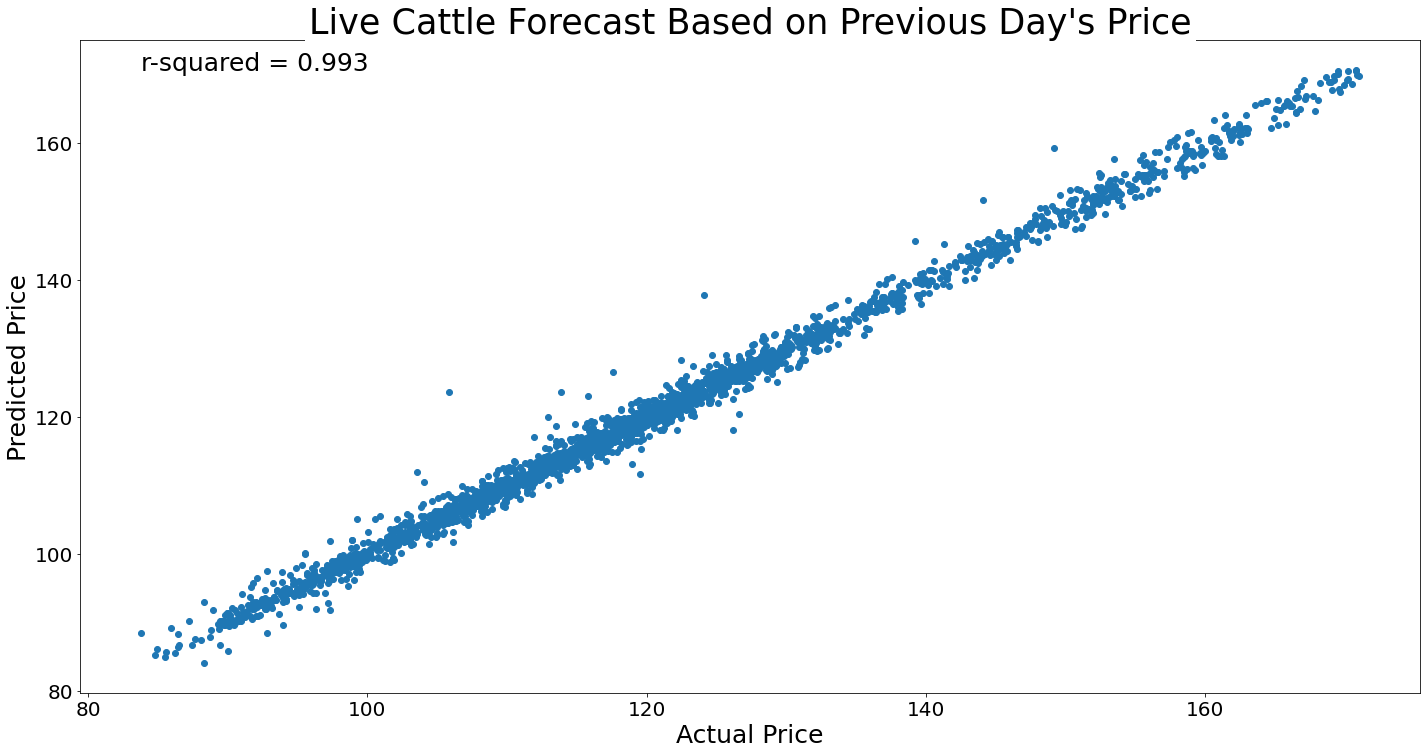

In [50]:
for x in range(len(data_frame_list)):
    X = data_frame_list[x].iloc[:,2:3]
    Y = data_frame_list[x][commodity_list[x]]
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=0.33, random_state=1)
    model = LinearRegression()
        # Fit to model
    model.fit(X_train, Y_train)
        # predict
    predictions = model.predict(X)
    print(mean_squared_error(Y, predictions))

        # %matplotlib inline 
    fig= plt.figure(figsize=(24,12))

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.scatter(Y,predictions)
    plt.xlabel("Actual Price", fontsize=25)
    plt.ylabel("Predicted Price", fontsize=25)
    ax = plt.axes()
    ax.set_facecolor('#FFFFFF')
    plt.title(f"{commodity_list[x]} Forecast Based on Previous Day's Price", fontsize=35, backgroundcolor='white')
    plt.rcParams['axes.facecolor'] = 'silver'
    plt.text(data_frame_list[x][commodity_list[x]].min(),predictions.max(),"r-squared = {:.3f}".format(r2_score(Y, predictions)), fontsize=25)
    print(r2_score(Y,predictions))
       
    path_to_save = 'static/data/' + (f'{commodity_list[x]} Based on Previous Day.png')
    plt.savefig(path_to_save)

430.70208417768345
0.9777609966523342
static/data/Corn Price Based on 5,10,20 Days.png
602.5992779721486
0.9584436137422995
static/data/Wheat Price Based on 5,10,20 Days.png
1279.2013970230391
0.9767343266524638
static/data/Soybean Price Based on 5,10,20 Days.png
19.309502710078277
0.9686468705490555
static/data/Cotton Price Based on 5,10,20 Days.png
10.706344035239784
0.9633053435858816
static/data/Live Cattle Based on 5,10,20 Days.png


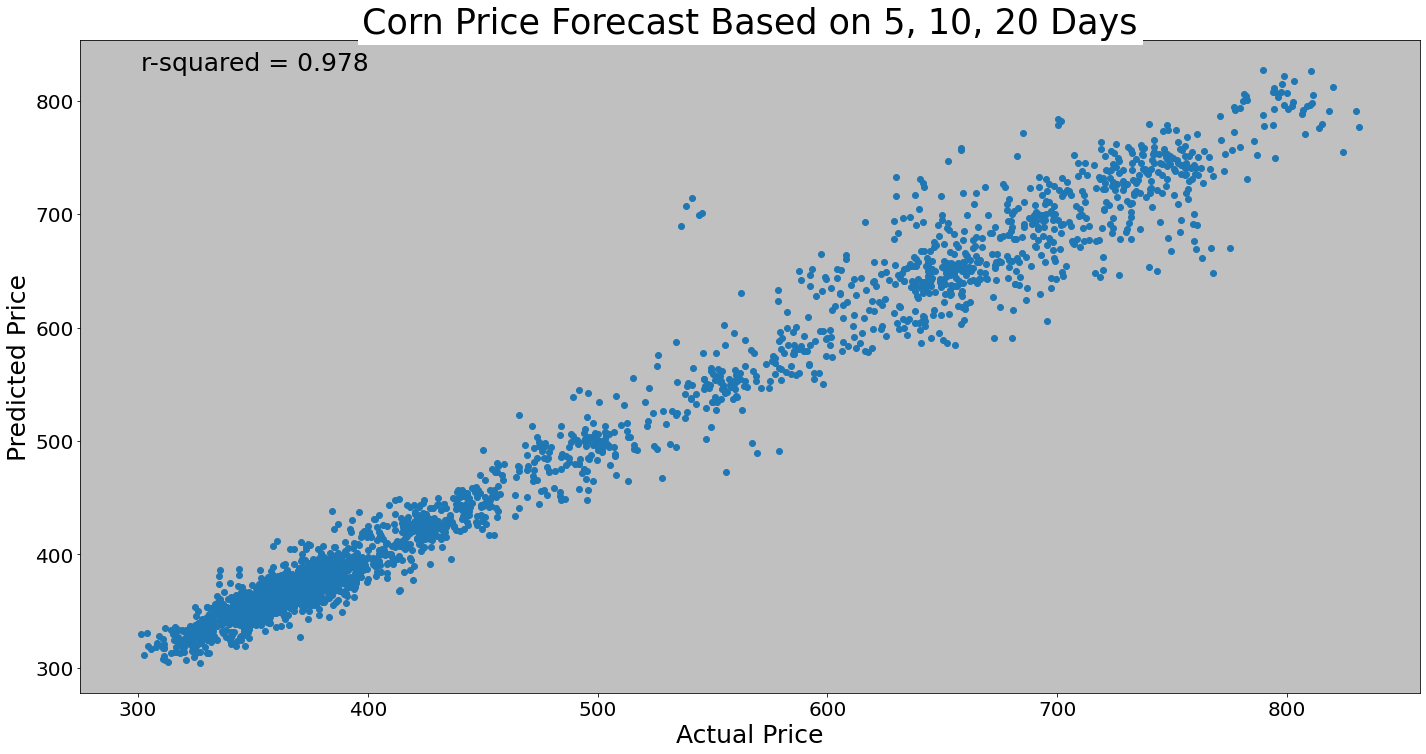

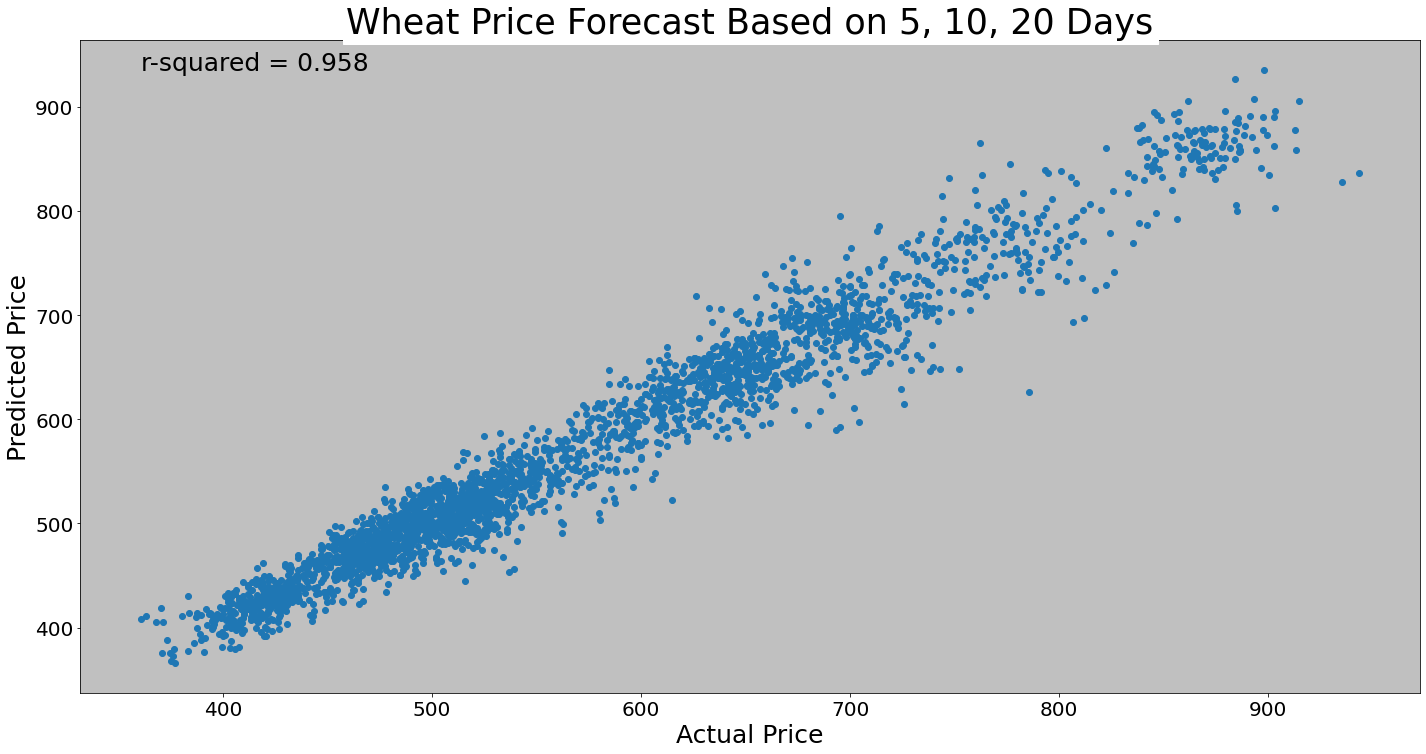

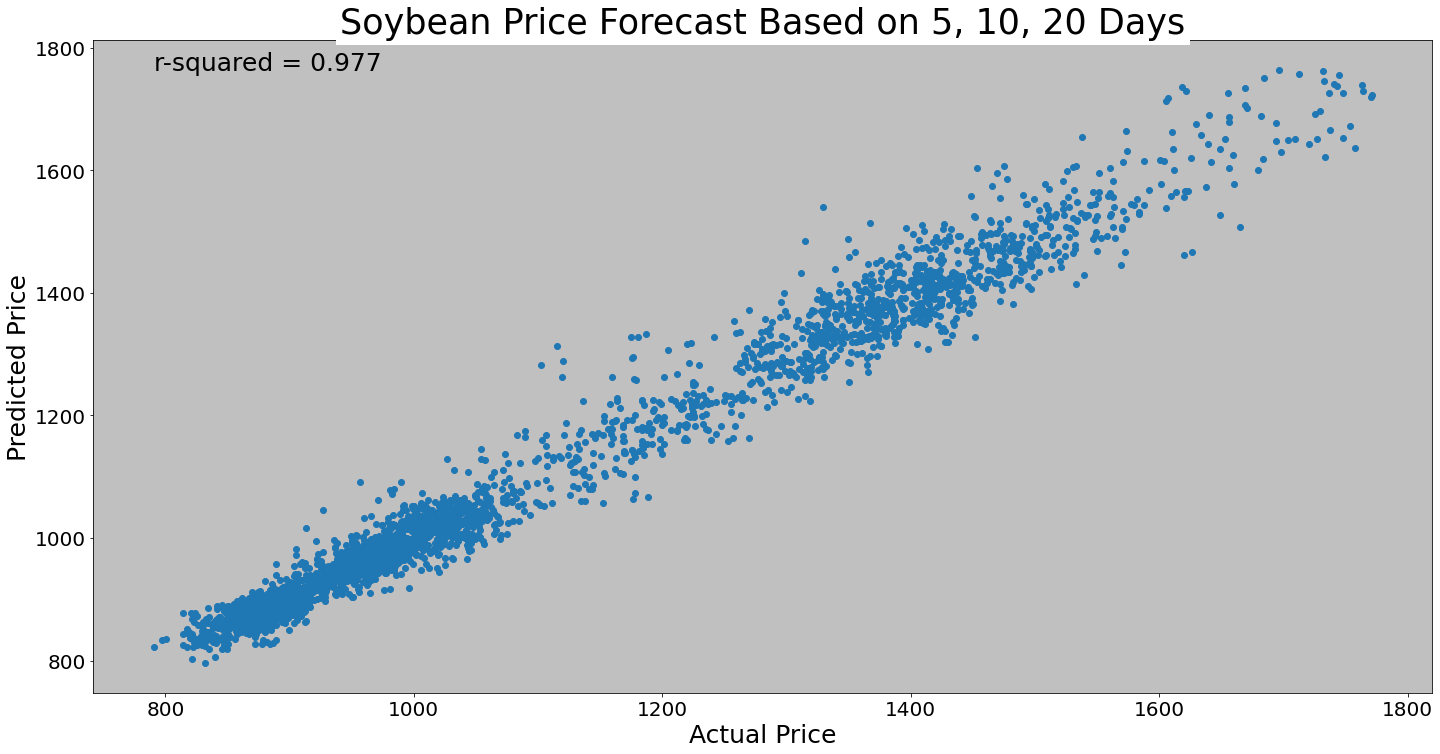

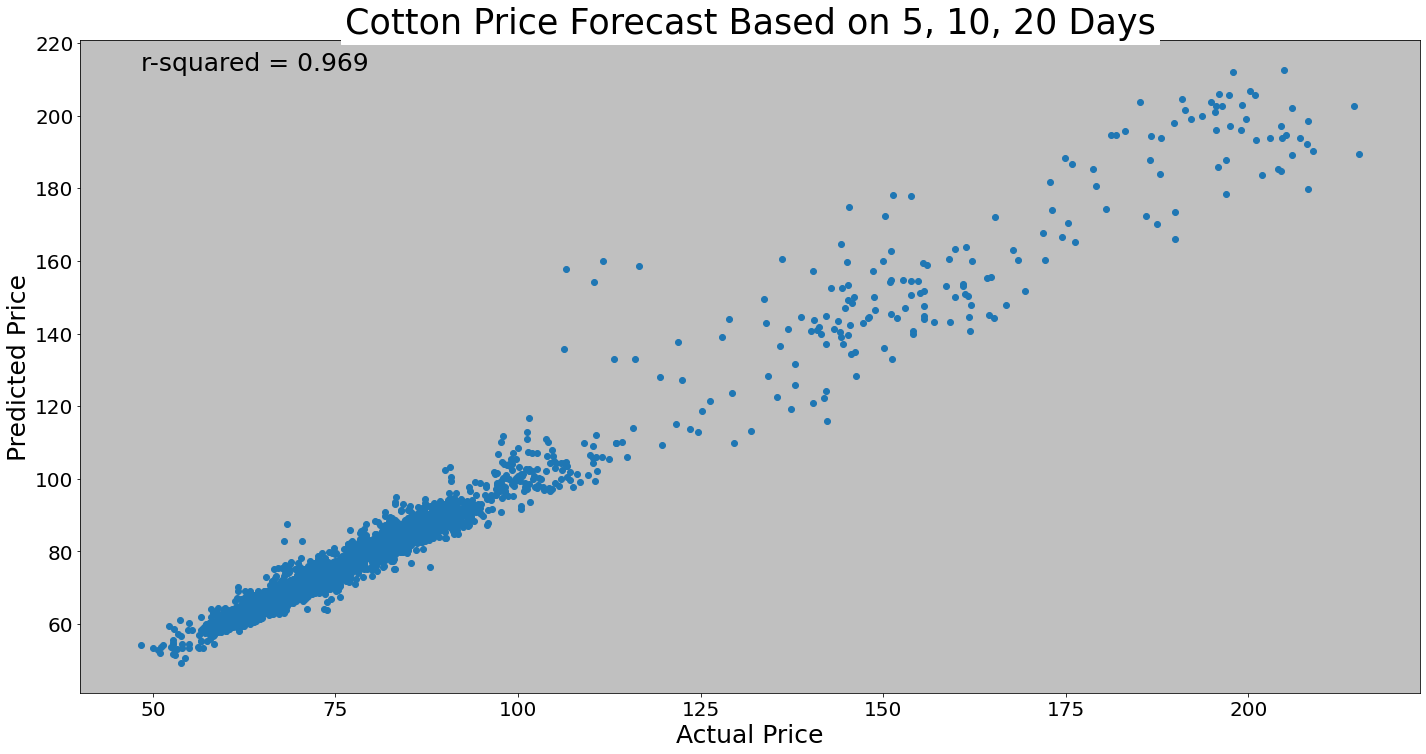

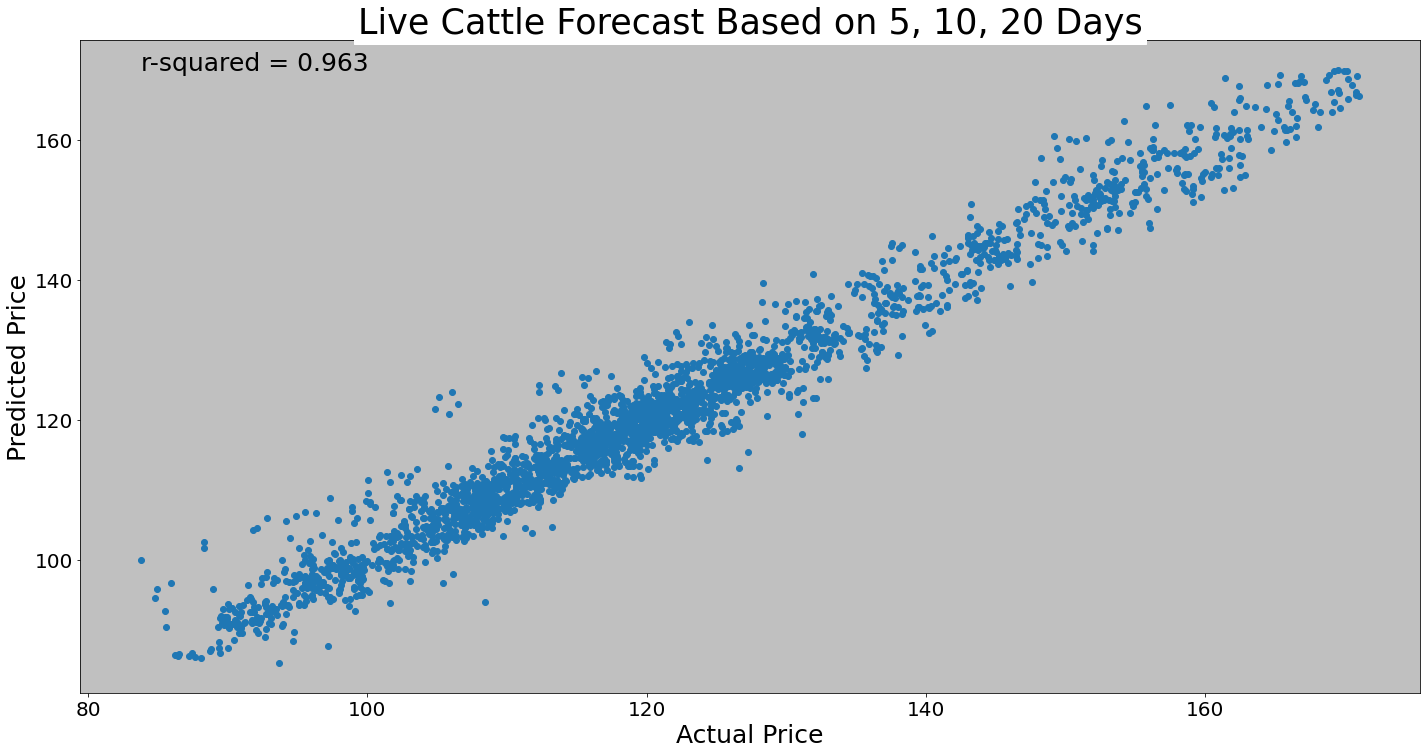

In [49]:
for x in range(len(data_frame_list)):
    X = data_frame_list[x].iloc[:,3:6]
    Y = data_frame_list[x][commodity_list[x]]
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=0.33, random_state=1)
    model = LinearRegression()
        # Fit to model
    model.fit(X_train, Y_train)
        # predict
    predictions = model.predict(X)
    print(mean_squared_error(Y, predictions))

        # %matplotlib inline 
    fig= plt.figure(figsize=(24,12))

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.scatter(Y,predictions)
    plt.xlabel("Actual Price", fontsize=25)
    plt.ylabel("Predicted Price", fontsize=25)
    plt.title(f"{commodity_list[x]} Forecast Based on 5, 10, 20 Days", fontsize=35, backgroundcolor='white')
    plt.rcParams['axes.facecolor'] = 'silver'
    plt.text(data_frame_list[x][commodity_list[x]].min(),predictions.max(),"r-squared = {:.3f}".format(r2_score(Y, predictions)), fontsize=25)
    print(r2_score(Y,predictions))
    
    custom_path = 'static/data/' + (f'{commodity_list[x]} Based on 5,10,20 Days.png')
    print(custom_path)
    
    plt.savefig(custom_path)

In [24]:
# corn_dataset = corn_df.values
# X = corn_dataset[:,2].reshape(-1,1)
# Y = corn_dataset[:,1:2]
# print(X)
# print(Y)

In [25]:
#test models option

In [26]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
# from sklearn.metrics import mean_squared_error

In [27]:
# model = LinearRegression()
# # Fit to model
# model.fit(X_train, Y_train)
# # predict
# predictions = model.predict(X)
# print(mean_squared_error(Y, predictions))

# # %matplotlib inline 
# fig= plt.figure(figsize=(24,12))

# plt.scatter(Y,predictions)
# plt.xlabel("Price Actual")
# plt.ylabel("Predicted Price)")
# plt.title("Price Forecast Based on Previous Price")


In [28]:
# # Using sklearn
# from sklearn.metrics import r2_score
# print (r2_score(Y, predictions))

In [29]:
# cornyCattle_df=price_df.drop(columns=['Soybean Price','Wheat Price','Cotton Price'])

In [30]:
# cornyCattle_df["Corn Price Lag"]= corn_df['Corn Price'].shift(2)
# cornyCattle_df.dropna(inplace=True)
# cornyCattle_df

In [31]:
# cornyCattle_dataset = cornyCattle_df.values
X = cornyCattle_dataset[:,3].reshape(-1,1)
Y = cornyCattle_dataset[:,2]
print(X)
print(Y)

NameError: name 'cornyCattle_dataset' is not defined

In [32]:
# model = LinearRegression()
# # Fit to model
# model.fit(X_train, Y_train)
# # predict
# predictions = model.predict(X)
# print(mean_squared_error(Y, predictions))

# # %matplotlib inline 
# fig= plt.figure(figsize=(24,12))

# plt.scatter(Y,predictions)
# plt.xlabel("Price Actual")
# plt.ylabel("Price Predicted)")
# plt.title("Price Forecast Based on Previous Price")

In [33]:
# model = Lasso()
# # Fit to model
# model.fit(X_train, Y_train)
# # predict
# predictions = model.predict(X)
# train_score=model.score(X_train,Y_train)
# test_score=model.score(X_validation,Y_validation)
# coeff_used = np.sum(model.coef_!=0)
# print ("training score:", train_score) 
# print ("test score: ", test_score)
# print ("number of features used: ", coeff_used)


# # %matplotlib inline 
# fig= plt.figure(figsize=(24,12))

# plt.scatter(Y,predictions)
# plt.xlabel("Price Forecast")
# plt.ylabel("Previous Price (2 Days)")
# plt.title("Price Forecast Based on Previous Price")
